# Import Necessary Libraries

In [133]:
# System
import pathlib
import glob
import os, os.path, shutil
# Data Exploration 
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#import pandas as pd
#import seaborn as sns
from PIL import Image

#CNN Learning
import tensorflow as tf
import keras
from keras.utils import plot_model 
from keras import backend as K 
from keras import metrics
from keras.regularizers import l2,l1
from tensorflow.keras.utils import Sequence
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, InputLayer, Activation
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.metrics import AUC
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Data Directory

In [134]:
train_dir = 'split/train'
train_CORROSION_dir = 'split/train/CORROSION/'
train_NOCORROSION_dir = 'split/train/NOCORROSION/'

validation_dir = 'split/validation'
validation_CORROSION_dir = 'split/validation/CORROSION/'
validation_NOCORROSION_dir = 'split/validation/NOCORROSION/'

test_dir = 'split/test'
test_CORROSION_dir = 'split/test/CORROSION/'
test_NOCORROSION_dir = 'split/test/NOCORROSION/'

In [135]:
def num_files_in_direcotry(path):
    num = len([file for file in os.listdir(path) if file.endswith('.jpg')])
    return num

In [136]:
train_CORROSION_num = num_files_in_direcotry(train_CORROSION_dir)
train_NOCORROSION_num = num_files_in_direcotry(train_NOCORROSION_dir)
train_SUM_num = train_CORROSION_num + train_NOCORROSION_num

print("[Train] Number of CORROSION Images: ", train_CORROSION_num)
print("[Train] Number of NOCORROSION Images: ", train_NOCORROSION_num)
print("[Train] Number of TOTAL Images: ", train_SUM_num)

[Train] Number of CORROSION Images:  693
[Train] Number of NOCORROSION Images:  580
[Train] Number of TOTAL Images:  1273


In [137]:
val_CORROSION_num = num_files_in_direcotry(validation_CORROSION_dir)
val_NOCORROSION_num = num_files_in_direcotry(validation_NOCORROSION_dir)
val_SUM_num = val_CORROSION_num + val_NOCORROSION_num

print("[Validation] Number of CORROSION Images: ", val_CORROSION_num)
print("[Validation] Number of NOCORROSION Images: ", val_NOCORROSION_num)
print("[Validation] Number of TOTAL Images: ", val_SUM_num)

[Validation] Number of CORROSION Images:  198
[Validation] Number of NOCORROSION Images:  166
[Validation] Number of TOTAL Images:  364


In [138]:
test_CORROSION_num = num_files_in_direcotry(test_CORROSION_dir)
test_NOCORROSION_num = num_files_in_direcotry(test_NOCORROSION_dir)
test_SUM_num = test_CORROSION_num + test_NOCORROSION_num

print("[Test] Number of CORROSION Images: ", test_CORROSION_num)
print("[Test] Number of NOCORROSION Images: ", test_NOCORROSION_num)
print("[Test] Number of TOTAL Images: ", test_SUM_num)

[Test] Number of CORROSION Images:  102
[Test] Number of NOCORROSION Images:  83
[Test] Number of TOTAL Images:  185


# Function for data generation from directory


In [139]:
# Build data generator function

def make_data_generator(
    train_datagen, train_dir, 
    val_datagen, val_dir, 
    test_datagen, test_dir):
    
    datagen_lst = [train_datagen, val_datagen, test_datagen]
    directory_lst = [train_dir, val_dir, test_dir]
    generator_lst = []
    for generator, directory in zip(datagen_lst, directory_lst):
        if directory == train_dir:
            shuffle = True
        else:
            shuffle = False
        g = generator.flow_from_directory(directory = directory,
                                         target_size = (128,128),
                                         batch_size = 32,
                                         color_mode = 'rgb',
                                         class_mode = 'binary',
                                         shuffle = shuffle,
                                         seed = 42
                                         )
        generator_lst.append(g)
    
    return generator_lst

In [140]:
# Load the images

train_datagen = ImageDataGenerator(rescale = 1.0/255.0)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator,val_generator, test_generator = make_data_generator(
    train_datagen, train_dir,
    val_datagen, validation_dir,
    test_datagen, test_dir)

Found 1273 images belonging to 2 classes.
Found 364 images belonging to 2 classes.
Found 185 images belonging to 2 classes.


In [9]:
 # Design the model
    
def build_model_1():
    cnn = Sequential()

    cnn.add(InputLayer(input_shape=(128, 128, 3)))

    cnn.add(Conv2D(128, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Conv2D(64, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Conv2D(32, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Conv2D(16, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D((2, 2)))
    

    cnn.add(Flatten())

    cnn.add(Dense(256, activation='relu'))
    cnn.add(Dense(1, activation='sigmoid'))
    
    # Compile
    cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
    return cnn

cnn = build_model_1()

In [105]:
# Load the images

train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                   shear_range = 0.2,
                                   zoom_range = 0.2, 
                                   horizontal_flip = True,
                                   vertical_flip = True)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator,val_generator, test_generator = make_data_generator(
    train_datagen, train_dir,
    val_datagen, validation_dir,
    test_datagen, test_dir)

Found 1273 images belonging to 2 classes.
Found 364 images belonging to 2 classes.
Found 185 images belonging to 2 classes.


In [128]:
cnn_model = cnn.fit_generator(train_generator,
                            epochs = 30,
                            steps_per_epoch = len(train_generator),
                            validation_data = val_generator,
                            validation_steps = len(val_generator))

C:\Users\DARTHV~1\AppData\Local\Temp/ipykernel_13832/1288473111.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model = cnn.fit_generator(train_generator,


Epoch 1/30
40/40 [==============================] - 73s 2s/step - loss: 0.3062 - acc: 0.8688 - val_loss: 0.5398 - val_acc: 0.7995
Epoch 2/30
40/40 [==============================] - 43s 1s/step - loss: 0.3280 - acc: 0.8688 - val_loss: 0.4959 - val_acc: 0.7775
Epoch 3/30
40/40 [==============================] - 42s 1s/step - loss: 0.3067 - acc: 0.8743 - val_loss: 0.4165 - val_acc: 0.8324
Epoch 4/30
40/40 [==============================] - 42s 1s/step - loss: 0.3044 - acc: 0.8720 - val_loss: 0.4899 - val_acc: 0.8104
Epoch 5/30
40/40 [==============================] - 43s 1s/step - loss: 0.2893 - acc: 0.8704 - val_loss: 0.5459 - val_acc: 0.7995
Epoch 6/30
40/40 [==============================] - 42s 1s/step - loss: 0.2937 - acc: 0.8743 - val_loss: 0.5253 - val_acc: 0.8049
Epoch 7/30
40/40 [==============================] - 42s 1s/step - loss: 0.2806 - acc: 0.8845 - val_loss: 0.4464 - val_acc: 0.8379
Epoch 8/30
40/40 [==============================] - 42s 1s/step - loss: 0.2999 - acc: 0.87

In [12]:
# Load the images

train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                   shear_range = 0.2,
                                   zoom_range = 0.2, 
                                   horizontal_flip = True,
                                   vertical_flip = True)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator,val_generator, test_generator = make_data_generator(
    train_datagen, train_dir,
    val_datagen, validation_dir,
    test_datagen, test_dir)

Found 1273 images belonging to 2 classes.
Found 364 images belonging to 2 classes.
Found 185 images belonging to 2 classes.


In [13]:
 # Design the model
    
def build_model_3():
    cnn = Sequential()

    cnn.add(InputLayer(input_shape=(128, 128, 3)))

    cnn.add(Conv2D(64, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Conv2D(32, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Conv2D(16, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D((2, 2)))
    

    cnn.add(Flatten())

    cnn.add(Dense(128, activation='relu'))
    cnn.add(Dense(1, activation='sigmoid'))
    
    # Compile
    cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
    return cnn

cnn_3 = build_model_3()

In [14]:
cnn_model_3 = cnn_3.fit_generator(train_generator,
                              epochs = 30,
                              steps_per_epoch = len(train_generator),
                              validation_data = val_generator,
                              validation_steps = len(val_generator),
                              verbose = 1)

C:\Users\DARTHV~1\AppData\Local\Temp/ipykernel_13832/2356722293.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model_3 = cnn_3.fit_generator(train_generator,


Epoch 1/30
40/40 [==============================] - 47s 1s/step - loss: 0.6876 - acc: 0.5625 - val_loss: 0.6406 - val_acc: 0.7170
Epoch 2/30
40/40 [==============================] - 43s 1s/step - loss: 0.6229 - acc: 0.6622 - val_loss: 0.6227 - val_acc: 0.6511
Epoch 3/30
40/40 [==============================] - 43s 1s/step - loss: 0.5822 - acc: 0.7054 - val_loss: 0.5629 - val_acc: 0.7308
Epoch 4/30
40/40 [==============================] - 43s 1s/step - loss: 0.5527 - acc: 0.7329 - val_loss: 0.5273 - val_acc: 0.7527
Epoch 5/30
40/40 [==============================] - 43s 1s/step - loss: 0.5046 - acc: 0.7636 - val_loss: 0.4978 - val_acc: 0.7802
Epoch 6/30
40/40 [==============================] - 43s 1s/step - loss: 0.5324 - acc: 0.7518 - val_loss: 0.5118 - val_acc: 0.7692
Epoch 7/30
40/40 [==============================] - 43s 1s/step - loss: 0.4893 - acc: 0.7683 - val_loss: 0.5690 - val_acc: 0.7445
Epoch 8/30
40/40 [==============================] - 43s 1s/step - loss: 0.4769 - acc: 0.77

In [15]:
 # Design the model
    
def build_model_4():
    cnn = Sequential()

    cnn.add(InputLayer(input_shape=(128, 128, 3)))

    
    cnn.add(Conv2D(64, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Dropout(0.1))
    
    cnn.add(Conv2D(32, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Dropout(0.1))
    
    cnn.add(Conv2D(16, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Dropout(0.1))
    

    cnn.add(Flatten())
    cnn.add(Dense(128, activation='relu'))
    cnn.add(Dense(1, activation='sigmoid'))
    
    # Compile
    cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
    return cnn

cnn_4 = build_model_4()

In [16]:
cnn_model_4 = cnn_4.fit_generator(train_generator,
                              epochs = 30,
                              steps_per_epoch = len(train_generator),
                              validation_data = val_generator,
                              validation_steps = len(val_generator))

C:\Users\DARTHV~1\AppData\Local\Temp/ipykernel_13832/3523512513.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model_4 = cnn_4.fit_generator(train_generator,


Epoch 1/30
40/40 [==============================] - 45s 1s/step - loss: 0.6900 - acc: 0.5648 - val_loss: 0.6795 - val_acc: 0.5549
Epoch 2/30
40/40 [==============================] - 19s 470ms/step - loss: 0.6620 - acc: 0.6253 - val_loss: 0.6533 - val_acc: 0.7060
Epoch 3/30
40/40 [==============================] - 19s 463ms/step - loss: 0.6036 - acc: 0.6976 - val_loss: 0.5717 - val_acc: 0.7033
Epoch 4/30
40/40 [==============================] - 19s 462ms/step - loss: 0.5575 - acc: 0.7258 - val_loss: 0.5414 - val_acc: 0.7363
Epoch 5/30
40/40 [==============================] - 19s 464ms/step - loss: 0.5560 - acc: 0.7219 - val_loss: 0.5215 - val_acc: 0.7610
Epoch 6/30
40/40 [==============================] - 19s 473ms/step - loss: 0.5100 - acc: 0.7526 - val_loss: 0.5060 - val_acc: 0.7665
Epoch 7/30
40/40 [==============================] - 19s 461ms/step - loss: 0.5229 - acc: 0.7439 - val_loss: 0.5385 - val_acc: 0.7418
Epoch 8/30
40/40 [==============================] - 19s 471ms/step - los

In [17]:
 # Design the model
    
def build_model_5():
    cnn = Sequential()

    cnn.add(InputLayer(input_shape=(128, 128, 3)))

    
    cnn.add(Conv2D(64, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Dropout(0.1))
    
    cnn.add(Conv2D(32, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Dropout(0.2))
    
    cnn.add(Conv2D(16, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Dropout(0.25))
    

    cnn.add(Flatten())
    cnn.add(Dense(128, activation='relu'))
    cnn.add(Dense(1, activation='sigmoid'))
    
    # Compile
    cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
    return cnn

cnn_5 = build_model_5()

In [18]:
cnn_model_5 = cnn_5.fit_generator(train_generator,
                              epochs = 30,
                              steps_per_epoch = len(train_generator),
                              validation_data = val_generator,
                              validation_steps = len(val_generator))

C:\Users\DARTHV~1\AppData\Local\Temp/ipykernel_13832/22032885.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model_5 = cnn_5.fit_generator(train_generator,


Epoch 1/30
40/40 [==============================] - 19s 465ms/step - loss: 0.6848 - acc: 0.5593 - val_loss: 0.6390 - val_acc: 0.6896
Epoch 2/30
40/40 [==============================] - 18s 440ms/step - loss: 0.6145 - acc: 0.6976 - val_loss: 0.6012 - val_acc: 0.7005
Epoch 3/30
40/40 [==============================] - 18s 442ms/step - loss: 0.5753 - acc: 0.7211 - val_loss: 0.5582 - val_acc: 0.7418
Epoch 4/30
40/40 [==============================] - 18s 446ms/step - loss: 0.5524 - acc: 0.7266 - val_loss: 0.5509 - val_acc: 0.7280
Epoch 5/30
40/40 [==============================] - 18s 461ms/step - loss: 0.5402 - acc: 0.7298 - val_loss: 0.5729 - val_acc: 0.7060
Epoch 6/30
40/40 [==============================] - 20s 503ms/step - loss: 0.5290 - acc: 0.7533 - val_loss: 0.5552 - val_acc: 0.7308
Epoch 7/30
40/40 [==============================] - 19s 473ms/step - loss: 0.5155 - acc: 0.7683 - val_loss: 0.5085 - val_acc: 0.7637
Epoch 8/30
40/40 [==============================] - 18s 449ms/step - 

In [19]:
 # Design the model
    
def build_model_6():
    cnn = Sequential()

    cnn.add(InputLayer(input_shape=(128, 128, 3)))

    cnn.add(Conv2D(128, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Dropout(0.1))
    
    cnn.add(Conv2D(64, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Dropout(0.2))
    
    cnn.add(Conv2D(32, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Dropout(0.2))
    
    cnn.add(Conv2D(16, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Dropout(0.2))
    

    cnn.add(Flatten())
    cnn.add(Dense(128, activation='relu'))
    cnn.add(Dropout(0.2))
    cnn.add(Dense(1, activation='sigmoid'))
    
    # Compile
    cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
    return cnn

cnn_6 = build_model_6()

In [20]:
cnn_model_6 = cnn_6.fit_generator(train_generator,
                              epochs = 100,
                              steps_per_epoch = len(train_generator),
                              validation_data = val_generator,
                              validation_steps = len(val_generator))

C:\Users\DARTHV~1\AppData\Local\Temp/ipykernel_13832/3728464860.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model_6 = cnn_6.fit_generator(train_generator,


Epoch 1/100
40/40 [==============================] - 19s 468ms/step - loss: 0.6906 - acc: 0.5679 - val_loss: 0.6463 - val_acc: 0.6703
Epoch 2/100
40/40 [==============================] - 18s 456ms/step - loss: 0.6243 - acc: 0.6646 - val_loss: 0.5976 - val_acc: 0.7198
Epoch 3/100
40/40 [==============================] - 18s 445ms/step - loss: 0.5904 - acc: 0.7164 - val_loss: 0.5609 - val_acc: 0.7390
Epoch 4/100
40/40 [==============================] - 18s 447ms/step - loss: 0.5613 - acc: 0.7384 - val_loss: 0.5581 - val_acc: 0.7363
Epoch 5/100
40/40 [==============================] - 18s 453ms/step - loss: 0.5854 - acc: 0.7125 - val_loss: 0.6152 - val_acc: 0.6813
Epoch 6/100
40/40 [==============================] - 18s 451ms/step - loss: 0.5584 - acc: 0.7243 - val_loss: 0.5336 - val_acc: 0.7418
Epoch 7/100
40/40 [==============================] - 18s 455ms/step - loss: 0.5386 - acc: 0.7471 - val_loss: 0.5408 - val_acc: 0.7720
Epoch 8/100
40/40 [==============================] - 18s 455ms

In [28]:
cnn_6.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 63, 63, 128)      0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 63, 63, 128)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 61, 61, 64)        73792     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 30, 30, 64)       

In [21]:
 # Design the model
    
def build_model_7():
    cnn = Sequential()

    cnn.add(InputLayer(input_shape=(128, 128, 3)))

    cnn.add(Conv2D(128, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Dropout(0.1))
    
    cnn.add(Conv2D(64, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Dropout(0.2))
    
    cnn.add(Conv2D(32, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Dropout(0.2))
    
    cnn.add(Conv2D(16, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Dropout(0.2))
    

    cnn.add(Flatten())
    cnn.add(Dense(128, activation='relu'))
    cnn.add(Dense(1, activation='sigmoid'))
    
    # Compile
    cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
    return cnn

cnn_7 = build_model_7()

In [22]:
cnn_model_7 = cnn_7.fit_generator(train_generator,
                              epochs = 30,
                              steps_per_epoch = len(train_generator),
                              validation_data = val_generator,
                              validation_steps = len(val_generator))

C:\Users\DARTHV~1\AppData\Local\Temp/ipykernel_13832/2817708060.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model_7 = cnn_7.fit_generator(train_generator,


Epoch 1/30
40/40 [==============================] - 19s 468ms/step - loss: 0.6832 - acc: 0.5397 - val_loss: 0.6889 - val_acc: 0.5412
Epoch 2/30
40/40 [==============================] - 18s 442ms/step - loss: 0.6498 - acc: 0.6426 - val_loss: 0.7782 - val_acc: 0.5357
Epoch 3/30
40/40 [==============================] - 18s 444ms/step - loss: 0.6556 - acc: 0.6292 - val_loss: 0.5719 - val_acc: 0.7280
Epoch 4/30
40/40 [==============================] - 19s 467ms/step - loss: 0.5706 - acc: 0.7243 - val_loss: 0.6108 - val_acc: 0.7308
Epoch 5/30
40/40 [==============================] - 18s 456ms/step - loss: 0.5519 - acc: 0.7361 - val_loss: 0.6193 - val_acc: 0.6648
Epoch 6/30
40/40 [==============================] - 18s 454ms/step - loss: 0.5445 - acc: 0.7258 - val_loss: 0.5675 - val_acc: 0.7418
Epoch 7/30
40/40 [==============================] - 18s 448ms/step - loss: 0.5317 - acc: 0.7518 - val_loss: 0.5872 - val_acc: 0.7335
Epoch 8/30
40/40 [==============================] - 18s 449ms/step - 

In [23]:
 # Design the model
    
def build_model_8():
    cnn = Sequential()

    cnn.add(InputLayer(input_shape=(128, 128, 3)))

    cnn.add(Conv2D(128, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Dropout(0.1))
    
    cnn.add(Conv2D(64, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Dropout(0.2))
    
    cnn.add(Conv2D(32, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Dropout(0.2))
    
    cnn.add(Conv2D(16, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D((2, 2)))
    cnn.add(Dropout(0.2))
    

    cnn.add(Flatten())
    cnn.add(Dense(256, activation='relu'))
    cnn.add(Dense(1, activation='sigmoid'))
    
    # Compile
    cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
    return cnn

cnn_8 = build_model_8()

In [24]:
cnn_model_8 = cnn_8.fit_generator(train_generator,
                              epochs = 30,
                              steps_per_epoch = len(train_generator),
                              validation_data = val_generator,
                              validation_steps = len(val_generator))

C:\Users\DARTHV~1\AppData\Local\Temp/ipykernel_13832/594959667.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model_8 = cnn_8.fit_generator(train_generator,


Epoch 1/30
40/40 [==============================] - 19s 456ms/step - loss: 0.6886 - acc: 0.5420 - val_loss: 0.6667 - val_acc: 0.6648
Epoch 2/30
40/40 [==============================] - 18s 444ms/step - loss: 0.6536 - acc: 0.6426 - val_loss: 0.6652 - val_acc: 0.6786
Epoch 3/30
40/40 [==============================] - 18s 445ms/step - loss: 0.6319 - acc: 0.6677 - val_loss: 0.6240 - val_acc: 0.6566
Epoch 4/30
40/40 [==============================] - 18s 449ms/step - loss: 0.5675 - acc: 0.7306 - val_loss: 0.5751 - val_acc: 0.7335
Epoch 5/30
40/40 [==============================] - 18s 447ms/step - loss: 0.5604 - acc: 0.7368 - val_loss: 0.5768 - val_acc: 0.7170
Epoch 6/30
40/40 [==============================] - 18s 443ms/step - loss: 0.5633 - acc: 0.7306 - val_loss: 0.5722 - val_acc: 0.7170
Epoch 7/30
40/40 [==============================] - 18s 445ms/step - loss: 0.5156 - acc: 0.7651 - val_loss: 0.5207 - val_acc: 0.7830
Epoch 8/30
40/40 [==============================] - 18s 447ms/step - 

In [142]:
 # Design the model
    

cnn = tf.keras.models.Sequential()

cnn.add(InputLayer(input_shape=(128, 128, 3)))

cnn.add(Conv2D(128, (3, 3), activation='relu'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Dropout(0.1))
    
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Dropout(0.2))
    
cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Dropout(0.2))
    
cnn.add(Conv2D(16, (3, 3), activation='relu'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Dropout(0.2))
cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.1))
cnn.add(Dense(1, activation='sigmoid'))
    
    # Compile
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])




In [143]:
cnn.fit(train_generator,
        epochs = 5,
        steps_per_epoch = len(train_generator),
        validation_data = val_generator,
        validation_steps = len(val_generator))

Epoch 1/5
40/40 [==============================] - 64s 2s/step - loss: 0.6971 - acc: 0.5255 - val_loss: 0.6878 - val_acc: 0.6621
Epoch 2/5
40/40 [==============================] - 34s 855ms/step - loss: 0.6696 - acc: 0.6135 - val_loss: 0.6583 - val_acc: 0.6346
Epoch 3/5
40/40 [==============================] - 34s 848ms/step - loss: 0.6055 - acc: 0.6960 - val_loss: 0.5944 - val_acc: 0.7033
Epoch 4/5
40/40 [==============================] - 34s 847ms/step - loss: 0.5638 - acc: 0.7258 - val_loss: 0.5960 - val_acc: 0.7115
Epoch 5/5
40/40 [==============================] - 34s 846ms/step - loss: 0.5216 - acc: 0.7478 - val_loss: 0.5431 - val_acc: 0.7527


In [144]:
train_generator.class_indices

{'CORROSION': 0, 'NOCORROSION': 1}

1/1 [==============================] - 0s 311ms/step
no corrosion


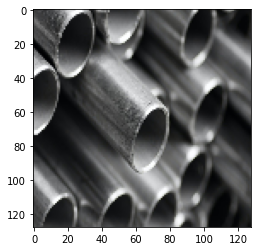

In [165]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2

test = image.load_img('no_corrosion_internet.jpg',target_size=(128,128))
plt.imshow(test)
test = image.img_to_array(test)
test = np.expand_dims(test, axis=0)
result = cnn.predict(test)


if result == 1:
    print('no corrosion')
else:
    print('corrosion')


